In [2]:
#interpolating ! 

import numpy as np
import matplotlib.pyplot as plt 
from scipy import interpolate 



error in cubic spline interpolation is  5.477763552034154e-05


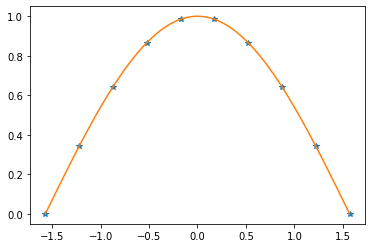

In [58]:
#Cubic spline 
#from class 

xmin = -np.pi/2
xmax = np.pi/2
points = 10

x = np.linspace(xmin,xmax,points)
y = np.cos(x)
xx = np.linspace(x[0],x[-1],2001)
y_true = np.cos(xx)


spln = interpolate.splrep(x,y)
yy_cubic = interpolate.splev(xx,spln)


plt.plot(x,y,'*',label='truth')
plt.plot(xx,yy_cubic,label='interpolation')
print('error in cubic spline interpolation is ',np.std(yy_cubic-y_true))

error in polynomial interpolation is  0.00046766456873070035


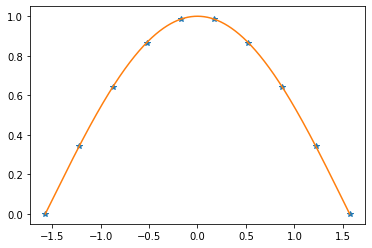

In [59]:
# Polynomial interpolation 
#using np.polyfit with a third degree polynomial

p = np.polyfit(x,y,5)
yy_poly = np.polyval(p,xx)


plt.plot(x,y,'*',label='truth')
plt.plot(xx,yy_poly,label='interpolation')
print('error in polynomial interpolation is ',np.std(yy_poly-y_true))

error in rational function interpolation is  1.2194257435784766e-07


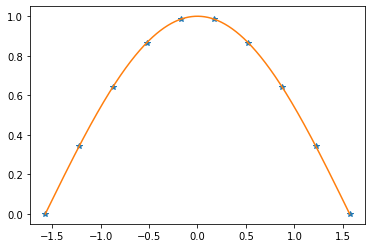

In [60]:
#rational function interpolation from class 
def rateval(x,p,q):
    top=0
    for i,par in enumerate(p):
        top=top+par*x**i
    bot=1
    for i,par in enumerate(q):
        bot=bot+par*x**(i+1)
    return top/bot

def ratfit(y,x,n,m):
    npt=len(x)
    assert(len(y)==npt)
    assert(n>=0)
    assert(m>=0)
    assert(n+1+m==npt)

    top_mat=np.empty([npt,n+1])
    bot_mat=np.empty([npt,m])
    for i in range(n+1):
        top_mat[:,i]=x**i
    for i in range(m):
        bot_mat[:,i]=y*x**(i+1)
    mat=np.hstack([top_mat,-bot_mat])
    #print(mat)
    pars=np.linalg.inv(mat)@y
    p=pars[:n+1]
    q=pars[n+1:]
    return mat,p,q


m=len(y)//2
n=len(y)-m-1

mat,p,q=ratfit(y,x,n,m)
yy_rat=rat_eval(p,q,xx)

plt.plot(x,y,'*',label='truth')
plt.plot(xx,yy_rat,label='interpolation')
print('error in rational function interpolation is ',np.std(yy_rat-y_true))

In [61]:
#for lorentzian 

def lor(x):
    return x/(1+x**2)

xmin_l = -1
xmax_l = 1

x_l = np.linspace(xmin_l,xmax_l,points)
y_l = lor(x_l)
xx_l = np.linspace(x_l[0],x_l[-1],2001)
y_true_l = lor(xx_l)



error in cubic spline interpolation is  6.741240456709967e-05


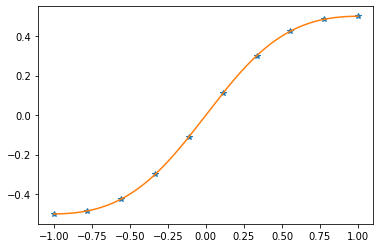

In [62]:
#Cubic for lorentzian
spln_l = interpolate.splrep(x_l,y_l)
yy_cubic_l = interpolate.splev(xx_l,spln_l)


plt.plot(x_l,y_l,'*',label='truth')
plt.plot(xx_l,yy_cubic_l,label='interpolation')
print('error in cubic spline interpolation is ',np.std(yy_cubic_l-y_true_l))

error in cubic spline interpolation is  0.002457107030741656


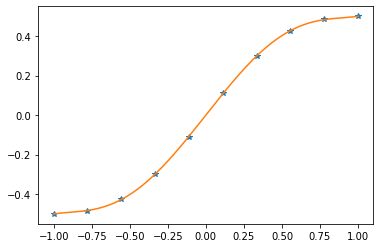

In [63]:
#polynomial interpolation for lorentzian 


p_l = np.polyfit(x_l,y_l,5)
yy_poly_l = np.polyval(p_l,xx_l)


plt.plot(x_l,y_l,'*',label='truth')
plt.plot(xx_l,yy_poly_l,label='interpolation')
print('error in cubic spline interpolation is ',np.std(yy_poly_l-y_true_l))

error in rational function interpolation is  0.5201678988408412


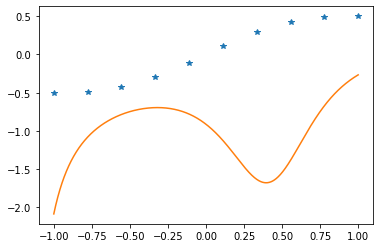

In [75]:
#rational function interpolation from class 
def rateval(x,p,q):
    top=0
    for i,par in enumerate(p):
        top=top+par*x**i
    bot=1
    for i,par in enumerate(q):
        bot=bot+par*x**(i+1)
    return top/bot

def ratfit(y,x,n,m):
    npt=len(x)
    assert(len(y)==npt)
    assert(n>=0)
    assert(m>=0)
    assert(n+1+m==npt)

    top_mat=np.empty([npt,n+1])
    bot_mat=np.empty([npt,m])
    for i in range(n+1):
        top_mat[:,i]=x**i
    for i in range(m):
        bot_mat[:,i]=y*x**(i+1)
    mat=np.hstack([top_mat,-bot_mat])
    #print(mat)
    pars=np.linalg.inv(mat)@y
    p=pars[:n+1]
    q=pars[n+1:]
    return mat,p,q


m_l=len(y_l)//2
n_l=len(y_l)-m_l-1

mat_l,p_l,q_l=ratfit(y_l,x_l,n_l,m_l)
yy_rat_l=rat_eval(p_l,q_l,xx_l)

plt.plot(x_l,y_l,'*',label='truth')
plt.plot(xx_l,yy_rat_l,label='interpolation')
print('error in rational function interpolation is ',np.std(yy_rat_l-y_true))
#THIS IS SUPER CRAPPY !!! 

In [ ]:
# It looks like cubic interpolation is good overall for both functions, but that rational function interpolation 
# is better if you have the right m and n 
# I am too tired and confused to explain the rest of the question :< 